8192


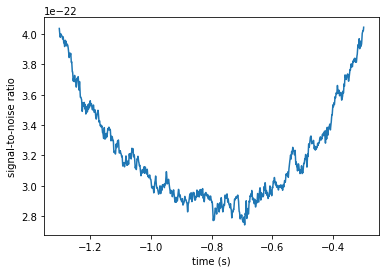

In [6]:
import pycbc.noise
import pycbc.psd
import pycbc.filter
import pycbc.waveform
import pylab
import numpy as np
flow = 40
delta_f = 1.0 / 40
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 2048
T = 1024
delta_t = 1.0 / 2048
# Generate some noise with an advanced ligo psd
flow = 30.0
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

# Generate 16 seconds of noise at 4096 Hz
delta_t = 1.0 / 4096
tsamples = int(16 / delta_t)
strain = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=127)
stilde = strain.to_frequencyseries()

# Use a waveform as a matched filter
hp, hc = pycbc.waveform.get_td_waveform(approximant="IMRPhenomPv2",
                             mass1=25, mass2=25,distance =7, delta_t = delta_t, f_lower = flow,delta_f=delta_f)
print(len(hp))
strain = np.array(strain[0:len(hp)])

snr = pycbc.filter.matched_filter(hp, hp+strain,
                                      low_frequency_cutoff=flow)
snr = snr[len(snr) // 4: len(snr) * 3 // 4]

pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('signal-to-noise ratio')
pylab.xlabel('time (s)')
pylab.show()
